In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import scipy as scipy
from scipy.stats import ttest_ind
import os

In [20]:
gpt_natural = pd.read_csv('gpt4v_results/df_natural.csv')
gpt_synthetic = pd.read_csv('gpt4v_results/df_synthetic.csv')
gpt_natural_temp0 = pd.read_csv('gpt4v_results/df_natural_temp0.csv')
gpt_synthetic_temp0 = pd.read_csv('gpt4v_results/df_synthetic_temp0.csv')

# GPT Main Result

In [21]:
def clean_df(df):
    df=df[['prompt_type','gpt4v_result_afforded','gpt4v_result_non_afforded','gpt4v_result_related']]
    df=df.rename(columns={'gpt4v_result_afforded':'afforded','gpt4v_result_non_afforded':'non_afforded','gpt4v_result_related':'related'})
    return df

def transform_df(gpt_n, gpt_s):
    df=pd.concat([gpt_n,gpt_s], axis=0)
    all=df.melt(id_vars=['prompt_type','cat'], value_vars=['afforded','non_afforded','related']).rename(columns={'variable':'conditions'})
    return all 

gpt_n = gpt_natural.pipe(clean_df).assign(cat='natural')
gpt_s = gpt_synthetic.pipe(clean_df).assign(cat='synthetic')
all = transform_df(gpt_n,gpt_s)
main=all.loc[all['conditions']!='related',:]

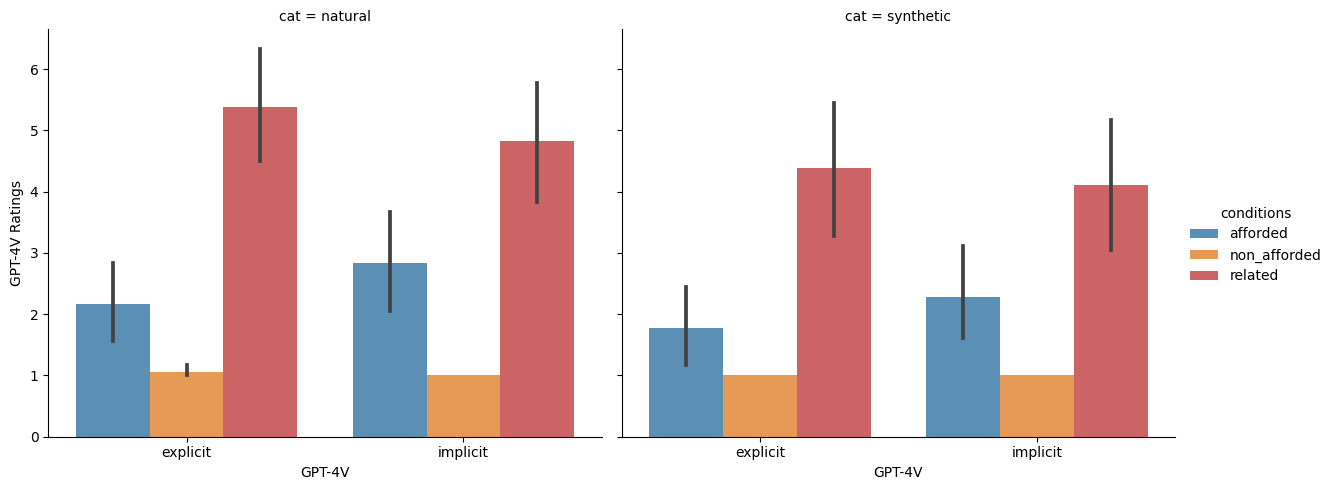

In [22]:
plot = sns.catplot(data = all,
            x = "prompt_type",
            y = "value",
            hue = "conditions",
            col = "cat",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C1','C3'],
            alpha= 0.8)

plot.set_axis_labels('GPT-4V','GPT-4V Ratings')

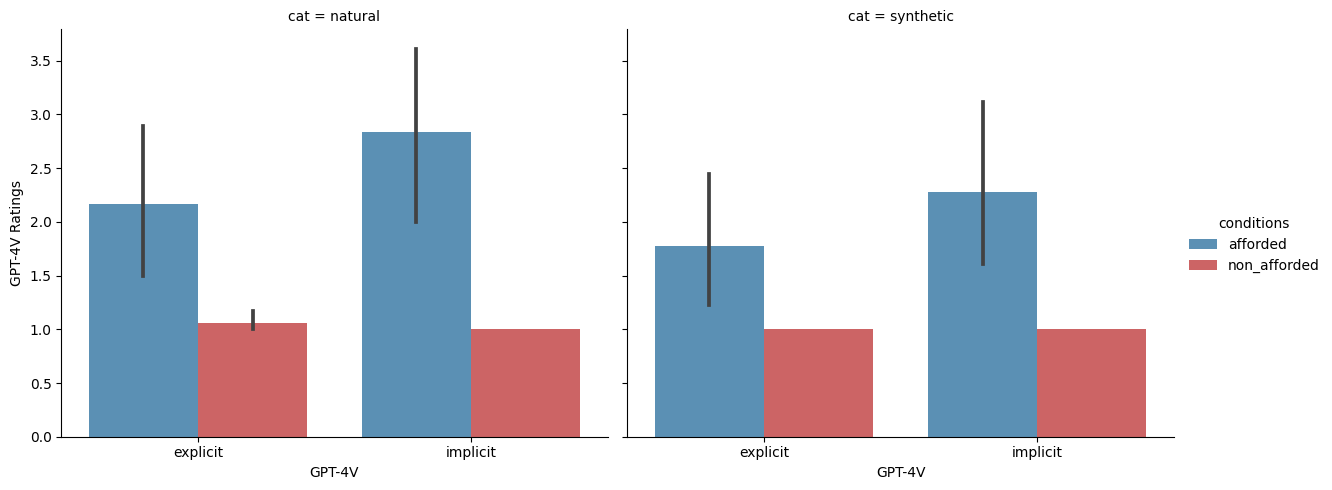

In [23]:
plot = sns.catplot(data = main,
            x = "prompt_type",
            y = "value",
            hue = "conditions",
            col = "cat",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'],
            alpha= 0.8)

plot.set_axis_labels('GPT-4V','GPT-4V Ratings')

# GPT4v Follow-Up & Significance Results

In [24]:
gpt_n = gpt_natural_temp0.pipe(clean_df).assign(cat='natural')
gpt_s = gpt_synthetic_temp0.pipe(clean_df).assign(cat='synthetic')
all_temp0 = transform_df(gpt_n,gpt_s)
main_temp0 = all_temp0.loc[all_temp0['conditions']!='related',:]

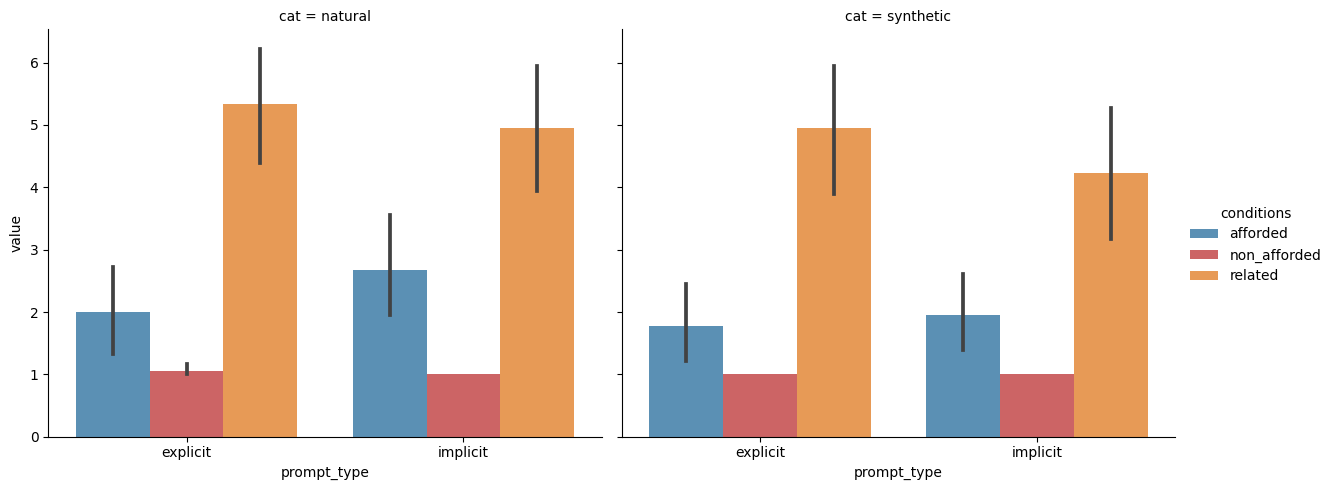

In [25]:
sns.catplot(data = all_temp0,
            x = "prompt_type",
            y = "value",
            hue = "conditions",
            col = "cat",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3','C1'],
            alpha= 0.8)

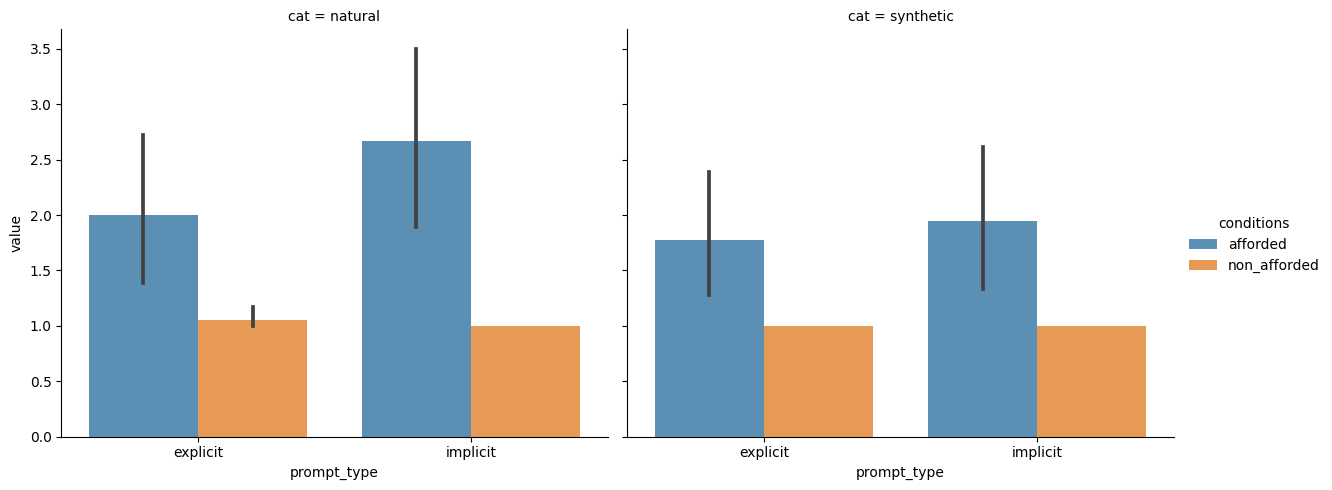

In [26]:
sns.catplot(data = main_temp0,
            x = "prompt_type",
            y = "value",
            hue = "conditions",
            col = "cat",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C1'],
            alpha= 0.8)

In [27]:
model = ols('value ~ C(conditions) + C(prompt_type) + C(conditions):C(prompt_type)', data=all_temp0).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result,'\n')

                                  sum_sq     df           F        PR(>F)
C(conditions)                 566.731481    2.0  112.442001  6.365253e-34
C(prompt_type)                  0.166667    1.0    0.066135  7.973018e-01
C(conditions):C(prompt_type)    8.527778    2.0    1.691948  1.866610e-01
Residual                      529.222222  210.0         NaN           NaN 



In [28]:
afforded = main_temp0.loc[main['conditions']=='afforded']
non_afforded = main_temp0.loc[main['conditions']=='non_afforded']
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Ttest_indResult(statistic=5.98828342983157, pvalue=1.6540030042523655e-08)

In [29]:
print('Natural Dataset T Test')
afforded = main_temp0.loc[(main_temp0['conditions']=='afforded') & (main_temp0['cat']=='natural')]
non_afforded = main_temp0.loc[(main_temp0['conditions']=='non_afforded') & (main_temp0['cat']=='natural')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Natural Dataset T Test


Ttest_indResult(statistic=4.6582626170104815, pvalue=1.4747175576539706e-05)

In [30]:
print('Synthetic Dataset T Test')
afforded = main_temp0.loc[(main_temp0['conditions']=='afforded') & (main_temp0['cat']=='synthetic')]
non_afforded = main_temp0.loc[(main['conditions']=='non_afforded') & (main_temp0['cat']=='synthetic')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value']) 

Synthetic Dataset T Test


/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_69735/2831991156.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])


Ttest_indResult(statistic=3.8117132194574412, pvalue=0.0002937847787614504)

# Significance Results?

## ANOVA

In [31]:
model = ols('value ~ C(conditions) + C(prompt_type) + C(conditions):C(prompt_type)', data=all).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result,'\n')

                                  sum_sq     df          F        PR(>F)
C(conditions)                 500.333333    2.0  94.256666  6.116827e-30
C(prompt_type)                  0.115741    1.0   0.043608  8.347865e-01
C(conditions):C(prompt_type)    9.148148    2.0   1.723399  1.809728e-01
Residual                      557.361111  210.0        NaN           NaN 



## T Test Full Data Set

In [32]:
afforded = main.loc[main['conditions']=='afforded']
non_afforded = main.loc[main['conditions']=='non_afforded']
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Ttest_indResult(statistic=6.53607294875467, pvalue=1.055367624871468e-09)

## T Test Separate Data Set

In [33]:
print('Natural Dataset T Test')
afforded = main.loc[(main['conditions']=='afforded') & (main['cat']=='natural')]
non_afforded = main.loc[(main['conditions']=='non_afforded') & (main['cat']=='natural')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Natural Dataset T Test


Ttest_indResult(statistic=5.279674664135603, pvalue=1.3850139381863638e-06)

In [34]:
print('Synthetic Dataset T Test')
afforded = main.loc[(main['conditions']=='afforded') & (main['cat']=='synthetic')]
non_afforded = main.loc[(main['conditions']=='non_afforded') & (main['cat']=='synthetic')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Synthetic Dataset T Test


/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_69735/2880311426.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])


Ttest_indResult(statistic=3.9577285860251625, pvalue=0.00017930583782849128)